In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 20

# Define paths (update these paths according to your directory structure)
BASE_DIR = 'D:\Currency detection\dataset'  # Your dataset base directory
TRAIN_DIR = os.path.join(BASE_DIR, 'train')   # Training data directory
TEST_DIR = os.path.join(BASE_DIR, 'test')     # Testing data directory

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Create the model
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Changed to 3 for 10, 20, and 100 rupee notes
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Save the model
model.save('currency_detection_model.h5')


Found 961 images belonging to 4 classes.
Found 238 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/20
31/31 [==============================] - 43s 1s/step - loss: 1.1470 - accuracy: 0.6649 - val_loss: 0.7298 - val_accuracy: 0.5840
Epoch 2/20
31/31 [==============================] - 40s 1s/step - loss: 0.0790 - accuracy: 0.9834 - val_loss: 1.1888 - val_accuracy: 0.5882
Epoch 3/20
31/31 [==============================] - 40s 1s/step - loss: 0.0514 - accuracy: 0.9886 - val_loss: 1.6842 - val_accuracy: 0.4454
Epoch 4/20
31/31 [==============================] - 40s 1s/step - loss: 0.1143 - accuracy: 0.9729 - val_loss: 0.5298 - val_accuracy: 0.7059
Epoch 5/20
31/31 [==============================] - 40s 1s/step - loss: 0.0377 - accuracy: 0.9958 - val_loss: 0.3020 - val_accuracy: 0.8739
Epoch 6/20
31/31 [==============================] - 40s 1s/step - loss: 0.0119 - accuracy: 0.9990 - val_loss: 0.3414 - val_accuracy: 0.8445
Epoch 7/20
31/31 [===================

25/25 [==============================] - 12s 469ms/step - loss: 0.0648 - accuracy: 0.9887

Test accuracy: 0.9887


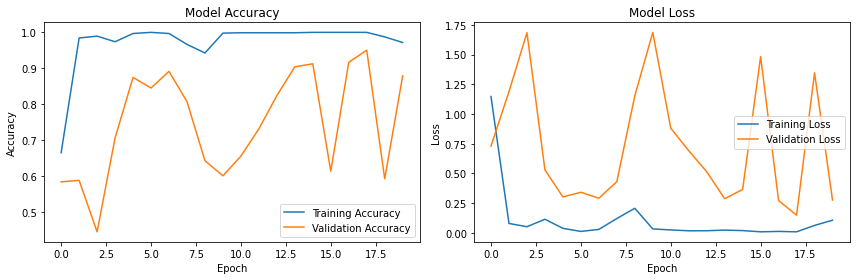

In [2]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Plot training results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
